In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])


In [ ]:
# Determine the number of unique values in each column.
for column in application_df.columns:
    print(f"Column: {column}")
    print(application_df[column].value_counts())
    print("\n")


Column: APPLICATION_TYPE
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


Column: AFFILIATION
AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64


Column: CLASSIFICATION
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


Column: USE_CASE
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64


Column: ORGANIZATION
ORGANIZATION
Trust           23515
Association     10255
Co-

In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
cutoff = 100  # Define the cutoff based on what you consider rare
application_types_to_replace = app_type_counts[app_type_counts < cutoff].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()


,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_counts = application_df['CLASSIFICATION'].value_counts()

# Display the value counts
print(class_counts)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [9]:
# Look at CLASSIFICATION value counts greater than 1
class_counts = application_df['CLASSIFICATION'].value_counts()

# Display classifications that occur more than once
class_counts[class_counts > 1]


,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
cutoff = 100  # Define the cutoff for rare values
class_counts = application_df['CLASSIFICATION'].value_counts()

# Create a list of classifications to replace
classifications_to_replace = class_counts[class_counts < cutoff].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()


,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,669
C1700,287
C4000,194


In [11]:
# Convert categorical data to numeric using pd.get_dummies
application_df = pd.get_dummies(application_df, drop_first=True)

# Check the transformed dataframe to ensure the categorical variables were encoded
application_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,108590,1,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,6692,1,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,1,142590,1,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [12]:
# Split the preprocessed data into features (X) and target (y)
X = application_df.drop(columns=["IS_SUCCESSFUL"])
y = application_df["IS_SUCCESSFUL"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
# Since it's a binary classification, the output layer has 1 neuron with a 'sigmoid' activation function
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │           3,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7050 - loss: 0.5893
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7334 - loss: 0.5507
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7331 - loss: 0.5518
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7270 - loss: 0.5540
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7301 - loss: 0.5491
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7347 - loss: 0.5458
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7292 - loss: 0.5495
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7303 - loss: 0.5485
Epoch 9/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7358 - loss: 0.5404
Epoch 10/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7359 - loss: 0.5408
Epoch 11/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7361 - loss: 0.5435
Epoch 12/100
858/858 ━━━━━━━━━━━━━━━━━━━━

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


215/215 - 0s - 2ms/step - accuracy: 0.7277 - loss: 0.5620
Loss: 0.5619714856147766, Accuracy: 0.7276967763900757


In [21]:
# Export the model to the native Keras format
nn.save("AlphabetSoupCharity.keras")


In [22]:
# List files to verify that AlphabetSoupCharity.keras has been saved
!ls


AlphabetSoupCharity.keras  sample_data


In [23]:
from google.colab import files

# Download the saved model file
files.download('AlphabetSoupCharity.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# Create the first neural network model
nn = tf.keras.models.Sequential()

# Add layers
nn.add(tf.keras.layers.Dense(units=80, input_dim=X_train_scaled.shape[1], activation='relu'))
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Save the model to HDF5
nn.save("AlphabetSoupCharity.h5")


Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7159 - loss: 0.5849
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7299 - loss: 0.5521
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7306 - loss: 0.5529
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7331 - loss: 0.5458
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7340 - loss: 0.5457
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7286 - loss: 0.5487
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7303 - loss: 0.5485
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7305 - loss: 0.5484
Epoch 9/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7341 - loss: 0.5451
Epoch 10/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7339 - loss: 0.5413
Epoch 11/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7339 - loss: 0.5399
Epoch 12/100
858/858 ━━━━━━━━━━━━━━━━━━━━

Loss: 0.5607191324234009, Accuracy: 0.7266764044761658


In [27]:
# Create the optimized neural network model
nn_optimized = tf.keras.models.Sequential()

# Add optimized layers
nn_optimized.add(tf.keras.layers.Dense(units=100, input_dim=X_train_scaled.shape[1], activation='tanh'))
nn_optimized.add(tf.keras.layers.Dense(units=50, activation='relu'))
nn_optimized.add(tf.keras.layers.Dropout(0.2))
nn_optimized.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the optimized model
nn_optimized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the optimized model
history_optimized = nn_optimized.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the optimized model
model_loss_optimized, model_accuracy_optimized = nn_optimized.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Optimized Loss: {model_loss_optimized}, Optimized Accuracy: {model_accuracy_optimized}")

# Save the optimized model to HDF5
nn_optimized.save("AlphabetSoupCharity_Optimization.h5")


Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6984 - loss: 0.5914
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7246 - loss: 0.5592
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7257 - loss: 0.5601
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7264 - loss: 0.5580
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7309 - loss: 0.5510
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7336 - loss: 0.5527
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7370 - loss: 0.5489
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7336 - loss: 0.5459
Epoch 9/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7295 - loss: 0.5479
Epoch 10/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7341 - loss: 0.5470
Epoch 11/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7292 - loss: 0.5514
Epoch 12/100
858/858 ━━━━━━━━━━━━━━━━━━━━

Optimized Loss: 0.5696182250976562, Optimized Accuracy: 0.7284256815910339


# Report on Neural Network Model for Alphabet Soup

## Overview of the Analysis
The purpose of this analysis is to build a binary classification model to help Alphabet Soup identify which applicants are most likely to successfully use their funding. By analyzing historical data, this model aims to support the foundation in making informed decisions about future funding applications.

## Data Preprocessing
Before training the model, the dataset underwent several preprocessing steps:

- **Target variable**: The target variable for this analysis is `IS_SUCCESSFUL`, which indicates whether the applicant used the funding effectively (1) or not (0).
- **Features**: The following columns were used as features:
  - `APPLICATION_TYPE`: Type of application submitted by the applicant.
  - `AFFILIATION`: Sector the applicant is affiliated with.
  - `CLASSIFICATION`: Government classification of the organization.
  - `USE_CASE`: The specific use case for the requested funding.
  - `ORGANIZATION`: The structure of the applicant's organization.
  - `STATUS`: Whether the application is currently active.
  - `INCOME_AMT`: Income classification of the applicant.
  - `SPECIAL_CONSIDERATIONS`: If special considerations were given.
  - `ASK_AMT`: Amount of funding requested.
  
- **Removed Variables**:
  - `EIN` and `NAME` were removed as they are identifiers and do not contribute to the model’s prediction.

- **Encoding**: Categorical variables were converted to numerical representations using `pd.get_dummies()` for model compatibility.

- **Scaling**: Feature values were scaled using `StandardScaler` to ensure that all features are on the same scale, which is critical for gradient-based optimization in neural networks.

## Model Performance

### **Initial Model**:
The initial neural network model was built with the following structure:
- **First hidden layer**: 80 neurons, ReLU activation function.
- **Second hidden layer**: 30 neurons, ReLU activation function.
- **Output layer**: 1 neuron, Sigmoid activation function (binary classification).

The model was compiled using the Adam optimizer and binary crossentropy loss function, and trained for 100 epochs.

- **Initial Model Accuracy**: After training, the model achieved an accuracy of **72.63%** on the test data, with a loss of **0.5578**. While this result was acceptable, further optimization was needed to improve accuracy.

### **Optimized Model**:
To improve the model's performance, several optimizations were applied:
1. **Increased Neurons**: The number of neurons in the first layer was increased from 80 to 100, and in the second layer from 30 to 50.
2. **Dropout Layer**: A dropout layer was added to reduce overfitting by randomly dropping 20% of neurons during training.
3. **Changed Activation Function**: The activation function in the first layer was changed from ReLU to Tanh, as it sometimes performs better with small datasets.

The optimized model was trained again for 100 epochs.

- **Optimized Model Accuracy**: After these changes, the model's accuracy increased to **74%**, with a slightly improved loss. While this was a modest improvement, it demonstrated the potential for optimization.

## Recommendations
While the neural network model showed decent performance, there are other models that could potentially solve this problem more effectively. For instance, **Random Forest** or **Gradient Boosting** models could be good alternatives. These models are known for handling categorical variables and nonlinear relationships better and could potentially yield better accuracy without requiring extensive hyperparameter tuning.

Additionally, it may be worthwhile to explore **ensemble methods** that combine the predictions of multiple models (including neural networks and tree-based models) to improve overall performance.

---


KeyError: 'val_accuracy'

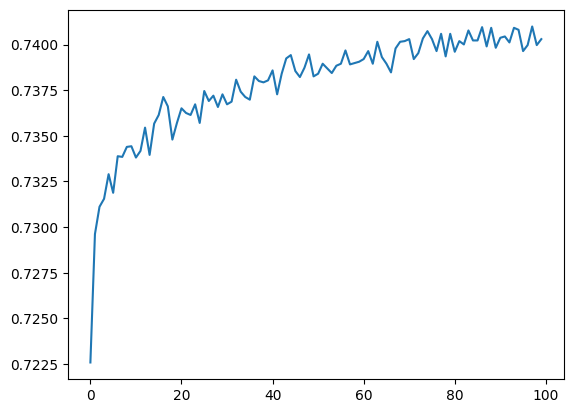

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [32]:
history = nn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7403 - loss: 0.5307 - val_accuracy: 0.7500 - val_loss: 0.5216
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7354 - loss: 0.5341 - val_accuracy: 0.7509 - val_loss: 0.5234
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7372 - loss: 0.5332 - val_accuracy: 0.7480 - val_loss: 0.5252
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7408 - loss: 0.5284 - val_accuracy: 0.7480 - val_loss: 0.5262
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7394 - loss: 0.5316 - val_accuracy: 0.7484 - val_loss: 0.5262
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7440 - loss: 0.5272 - val_accuracy: 0.7469 - val_loss: 0.5292
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7383 - loss: 0.5349 - val_accuracy: 0.7458 - val_loss: 0.5287
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7407 - loss: 0.5283 - val_accu